# Практическая работа №5: Исследование результатов фильтрации дискретного сигнала с помощью нерекурсивных фильтров, построенных на основе полиномиальных приближений

Выполнили студентки гр. 0382 Михайлова Оксана и Охотникова Галина. Вариант №12.

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью полиномиальных фильтров, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения

* _Дискретный сигнал:_ 

$x_0, x_1, x_2, ..., x_{N-1}$, получается при дискретизации аналогового сигнала $s(t)$ 

Будем считать, что отсчеты $x_k, k = 0,1,2,3, ..., N-1$ дискретного
сигнала получены в результате равномерной
дискретизации сигнала $s(t)$  с шагом дискретизации 1: 

$x_k = s(t_k), k = 0,1,2,3, ..., N-1; t_k - t_{k-1} = T, k = 1,2,3, ..., N-1; T = 1$

Если 

$t_k - t_{k-1} = \Delta t, k = 1,2,3, ..., N-1; \Delta t \ne 1$, 
то рассматриваем 

$\hat{t_k} = \dfrac{(t_k - t_0)}{\Delta t}, k = 0,1,2,3, ..., N-1$

В результате: 

$\hat{t_k} = k; s(\hat{t_k}) = s(k \Delta t), k = 0,1, ..., N-1$

* _Спектр дискретного сигнала:_

$S(\omega)=\displaystyle\sum_{k}x_k e^{-i\omega k}$

* _Дискретное преобразование Фурье:_

Поскольку $s(t)$ периодическая функция, ее можно
разложить в ряд Фурье, коэффициенты которого
вычисляются по формуле: 

$X(n) = \dfrac{1}{NT} \int\limits_0^{NT} s(t)e^{-i\omega_n t}dx$ или после преобразорваний $X(n) = \sum\limits_{k = 0}^{N-1} x_k e ^ { -i \dfrac{2\pi nk}{N}}, n = 0, 1, 2, ..., N-1$

## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на сглаживании полиномами. Полученные результаты содержательно проинтерпретировать. 

## Выполнение работы

In [7]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq, ifft, fftshift, rfft

### Пункт 1.

Формирование аналогового сигнала, который далее будет дискретизирован:

$s(t) = \displaystyle\sum_{k} A_k \cdot cos(\omega_kt+\varphi_k)$

$A_k$ определяется случайным образом из диапазона целых чисел от 1 до 11. 

$\varphi_k$ является случайной величиной из промежутка от 0 до 0.5. 

$\omega_k$ изменяется в пределах от 0 до $\pi$ с шагом $Δω=0.1\pi$. 



In [22]:
# вычисление параметров

A_k = []
omega_k = []
phi_k = []

for i in range(0, 11):
    A_k.append(random.randint(1, 11))
    omega_k.append(i*0.1*math.pi)
    phi_k.append(random.uniform(0, 0.5))


In [29]:
def s(t):
    s = 0
    for i in range(0, 11):
        s += A_k[i]*math.cos(omega_k[i]*t + phi_k[i])
    return s/sum(A_k)

def s_analog():
    s_t = []
    for t in np.arange(0, 32, 0.1):
        s_t.append(s(t))
    return s_t

def s_discrete():
    s_t = s_analog()
    x_k = []
    for i in np.arange(0, 32, 1):
        x_k.append(s_t[i*10])
    return x_k

print(s_analog())

[0.9606206719753161, 0.9087032062239807, 0.8265569253606272, 0.7191379750960085, 0.5930056925959228, 0.45582526624888264, 0.3157892361572238, 0.18100597558010975, 0.05890569617338461, -0.04428750329965634, -0.12397526564622861, -0.17746387095737795, -0.20408257212584296, -0.2051356874053168, -0.1836971884702903, -0.14426992329358132, -0.09234280348339181, -0.03388729099880312, 0.02516133165318307, 0.07939243928885659, 0.12433692393752167, 0.1567788067384566, 0.17493856014263637, 0.178517506688539, 0.16860570416238463, 0.14746818335383688, 0.1182351277530532, 0.08452961147143848, 0.05007115066907972, 0.01829421553187557, -0.007982003577419043, -0.026802523117675017, -0.037223088642336484, -0.039343942627227124, -0.03423195420959948, -0.02374328635347899, -0.010268362846281678, 0.003571891957934958, 0.015245391566387653, 0.022609864792845, 0.024164144925841822, 0.01922414022820426, 0.00800602313256005, -0.008391033517537071, -0.028099825863368476, -0.04868504346885081, -0.067406799932188

### Пункт 2

Визализирование данных.


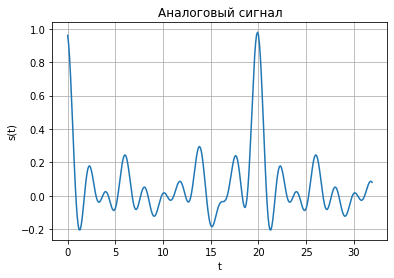

In [36]:
plt.title('Аналоговый сигнал')
plt.plot(np.arange(0, 32, 0.1), s_analog())
plt.xlabel('t')
plt.ylabel('s(t)')
plt.grid(True)
plt.show()


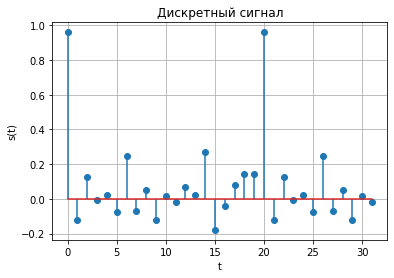

In [47]:
plt.title('Дискретный сигнал')
plt.stem(np.arange(0, 32, 1), s_discrete())
plt.xlabel('t')
plt.ylabel('s(t)')
plt.grid(True)
plt.show()

### Пункт 3.
С помощью ДПФ находятся дискретные отсчеты спектра дискретного сигнала.

Фрагмент последовательности:

$\{x_k\}$ из отсчётов $N = 20$. 

Результат - дискретная функция с периодом $NT$, где $T$ - период дискретизации:

$s(t) = \sum\limits_{k = -\infty}^{+\infty} x_k \delta(t - kT)$

Спектр $s(t)$ должен быть периодическим (с периодом ${{2\pi} \over T}$) и дискретным расстоянием между гармониками ${{2\pi} \over {NT}}$.

Поскольку $s(t)$ - периодическая функция, допустимо разложение в ряд Фурье с помощью ДПФ.


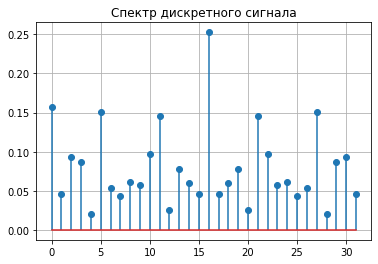

In [41]:
plt.stem(2*np.abs(fft(s_discrete()))/32)
plt.title('Cпектр дискретного сигнала')
plt.grid(True)
plt.show()

Спект симметричен относительно нуля, имеет переодичность с шагом 1.

### Пункт 4.

Для дискретного сигнала было применено линейное сглаживание по 5-ти и 9-ти точкам: 

* Передаточные функции фильтра для 5 и 9 точек:

$H_5 (\omega) = \frac15 (1 + 2\cos\omega + 2\cos{2\omega})$

$H_9(\omega) = \frac15 (1 + 2\cos\omega + 2\cos{2\omega} + 2\cos{3\omega} + 2\cos{4\omega})$

* Формула для линейного сглаживания по 5 точкам и 9 точкам:

$y_{n,5} = \frac15 \sum\limits_{k=n-2}^{n+2} x_k$

$y_{n,9} = \frac19 \sum\limits_{k=n-4}^{n+4} x_k$


In [43]:
y_5 = np.convolve(s_discrete(), np.ones(5), 'same') / 5
y_9 = np.convolve(s_discrete(), np.ones(9), 'same') / 9

### Пункт 5.

Визуализация полученных результатов.

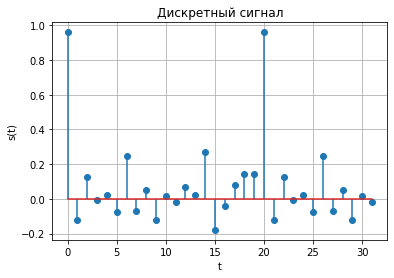

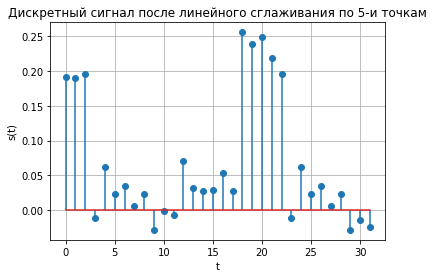

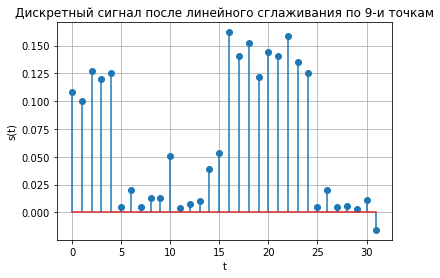

In [48]:
plt.title('Дискретный сигнал')
plt.stem(np.arange(0, 32, 1), s_discrete())
plt.xlabel('t')
plt.ylabel('s(t)')
plt.grid(True)
plt.show()

plt.stem(y_5)
plt.title('Дискретный сигнал после линейного сглаживания по 5-и точкам')
plt.xlabel('t')
plt.ylabel('s(t)')
plt.grid(True)
plt.show()

plt.stem(y_9)
plt.title('Дискретный сигнал после линейного сглаживания по 9-и точкам')
plt.xlabel('t')
plt.ylabel('s(t)')
plt.grid(True)
plt.show()

### Пункт 6.

$\quad$С помощью дискретного преобразования Фурье (ДПФ) найдены дискретные отсчеты спектров дискретных сигналов после фильтрации:

In [53]:
f_5 = fft(y_5)
f_5 = 2 * np.abs(f_5) / len(f_5)
f_9 = fft(y_9)
f_9 = 2 * np.abs(f_9) / len(f_9)

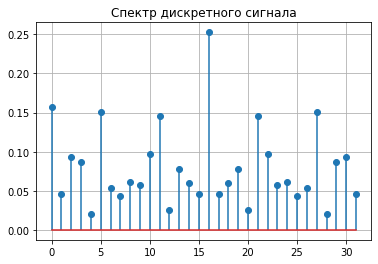

In [52]:
plt.stem(2*np.abs(fft(s_discrete()))/32)
plt.title('Cпектр дискретного сигнала')
plt.grid(True)
plt.show()

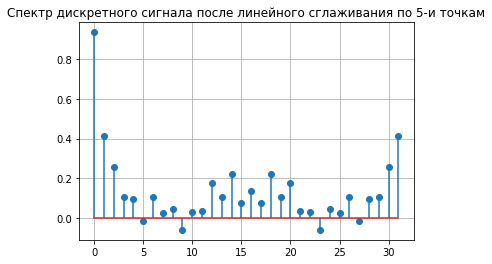

In [55]:
plt.stem(fft(f_5))
plt.title('Спектр дискретного сигнала после линейного сглаживания по 5-и точкам')
plt.grid(True)
plt.show()

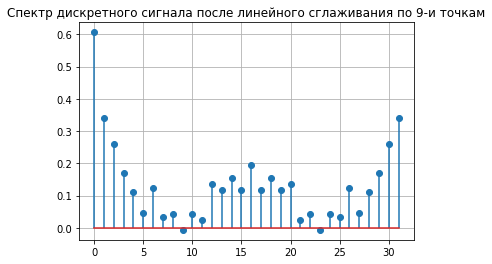

In [56]:
plt.stem(fft(f_9))
plt.title('Спектр дискретного сигнала после линейного сглаживания по 9-и точкам')
plt.grid(True)
plt.show()

### Пункт 7.
 
Анализ результатов:

1. Вид графиков спектра дискретного сигнала при сглаживании по 5-ти и 9-ти точкам повторяет контур $H(ω)$ при сглаживании по соответствующему числу точек.
2. Без ослабления пропускается только сигнал постоянного уровня (нулевой частоты). С увеличением числа точек полоса пропускания становится уже.


### Пункт 8.



#### a. Сглаживание полиномом 2-ой степени по 5 и 9 узлам.

* Cглаживание полиномом второй степени по 5 и 9 узлам:

$y_5(n) = \frac1{35}(-3x_{k-2} + 12x_{k-1} + 17x_k +12x_{k+1} - 3x_{k+2})$

$y_9(n) = \frac1{231}(-21x_{k-4} + 14x_{k-3} + 39x_{k-2} + 54x_{k-1} + 59x_k + 54x_{k+1} + 39x_{k+2} + 14x_{k+3} - 21x_{k+4})$

* Формула для передаточной функции (частотной характеристики) фильтра:

$H_5(\omega) = \frac1{35}(17 + 24\cos\omega - 6\cos{2\omega})$

$H_9(\omega) = \frac1{231}(59 + 108\cos\omega + 78\cos{2\omega} + 28\cos{3\omega} - 42\cos{4\omega})$

In [69]:
y_5 = np.convolve(s_discrete(), np.array([-3, 12, 17, 12, -3]), 'same') / 35
y_9 = np.convolve(s_discrete(), np.array([-21, 14, 39, 54, 59, 54, 39, 14,-21]), 'same') / 231

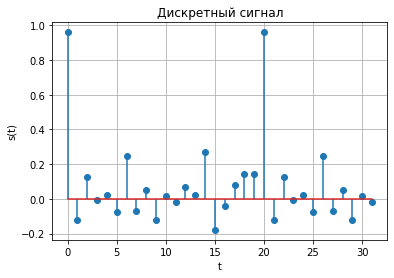

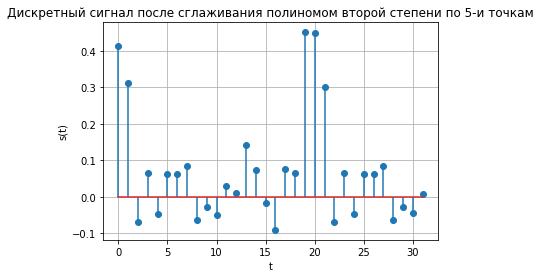

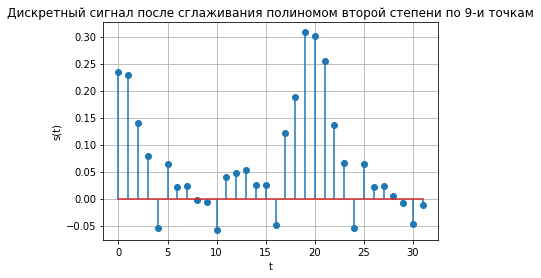

In [59]:
plt.title('Дискретный сигнал')
plt.stem(np.arange(0, 32, 1), s_discrete())
plt.xlabel('t')
plt.ylabel('s(t)')
plt.grid(True)
plt.show()

plt.stem(y_5)
plt.title('Дискретный сигнал после сглаживания полиномом второй степени по 5-и точкам')
plt.xlabel('t')
plt.ylabel('s(t)')
plt.grid(True)
plt.show()

plt.stem(y_9)
plt.title('Дискретный сигнал после сглаживания полиномом второй степени по 9-и точкам')
plt.xlabel('t')
plt.ylabel('s(t)')
plt.grid(True)
plt.show()

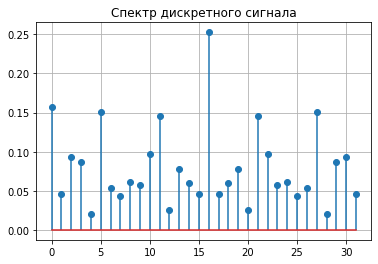

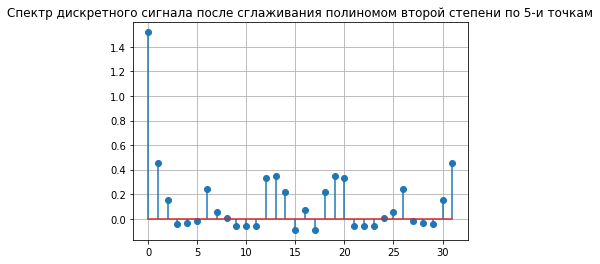

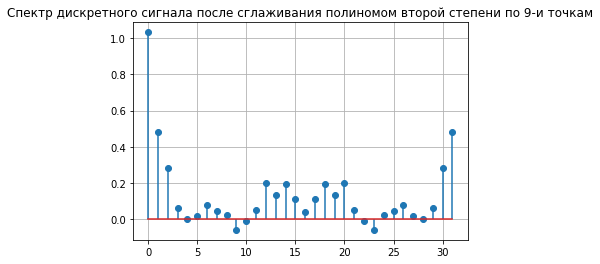

In [68]:
f_5 = fft(y_5)
f_5 = 2 * np.abs(f_5) / len(f_5)
f_9 = fft(y_9)
f_9 = 2 * np.abs(f_9) / len(f_9)

plt.stem(2*np.abs(fft(s_discrete()))/32)
plt.title('Cпектр дискретного сигнала')
plt.grid(True)
plt.show()

plt.stem(fft(f_5))
plt.title('Спектр дискретного сигнала после сглаживания полиномом второй степени по 5-и точкам')
plt.grid(True)
plt.show()

plt.stem(fft(f_9))
plt.title('Спектр дискретного сигнала после сглаживания полиномом второй степени по 9-и точкам')
plt.grid(True)
plt.show()

Анализ результатов:
1. Вид графиков спектра дискретного сигнала при сглаживании полиномом второй степени по 5-ти и 9-ти точкам повторяет контур $H(ω)$ при сглаживании по соответствующему числу точек.
2. При увеличении числа точек увеличивается крутизна среза и уменьшается полоса пропускания.

#### b. Сглаживание полиномом 4-ой степени по 7 и 11 узлам.

Сглаживание полиномом четвёртой степени по 7 и 11 узлам:

$y_7(n) = \frac1{231}(5x_{k-3} - 30x_{k-2} + 75x_{k-1} + 131x_k + 75x_{k+1} - 30x_{k+2} + 5x_{k+3})$

$y_{11}(n) = \frac1{429} (13x_{k-5} - 45x_{k-4} - 10x_{k-3} + 60x_{k-2} + 120x_{k-1} + 143x_k + 120x_{k+1} + 60x_{k+2} - 10x_{k+3} - 45x_{k+4} - 13x_{k+5})$

Формула для передаточной функции фильтра:

$H_7(\omega) = \frac1{231}(131 + 150\cos\omega - 60\cos{2\omega} + 10\cos{3\omega})$

$H_{11}(\omega) = \frac1{429}(143 + 240\cos\omega + 120\cos{2\omega} - 20\cos{2\omega} - 90\cos{4\omega} + 26\cos{5\omega})$

In [61]:
y_7 = np.convolve(s_discrete(), np.array([5, -30, 75, 131, 75, -30, 5]), 'same') / 231
y_11 = np.convolve(s_discrete(), np.array([13, -45, -10, 60, 120, 143, 120, 60, -10, -45, 13]), 'same') / 429

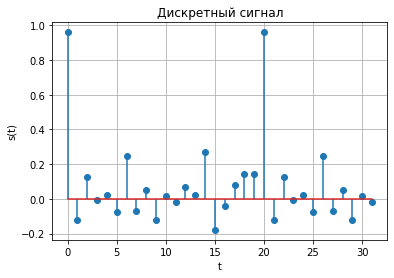

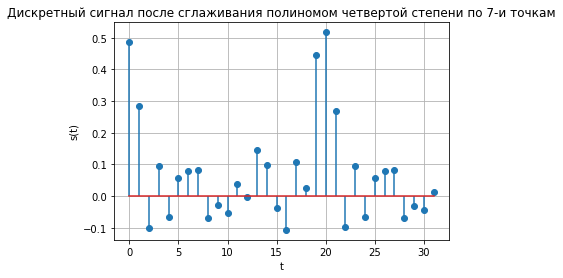

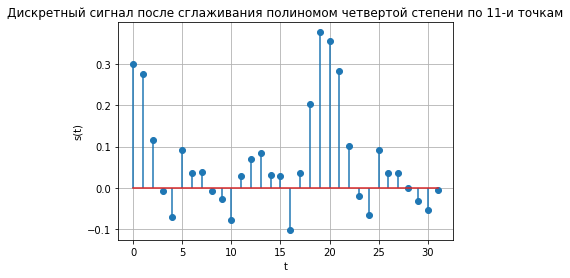

In [70]:
plt.title('Дискретный сигнал')
plt.stem(np.arange(0, 32, 1), s_discrete())
plt.xlabel('t')
plt.ylabel('s(t)')
plt.grid(True)
plt.show()

plt.stem(y_7)
plt.title('Дискретный сигнал после сглаживания полиномом четвертой степени по 7-и точкам')
plt.xlabel('t')
plt.ylabel('s(t)')
plt.grid(True)
plt.show()

plt.stem(y_11)
plt.title('Дискретный сигнал после сглаживания полиномом четвертой степени по 11-и точкам')
plt.xlabel('t')
plt.ylabel('s(t)')
plt.grid(True)
plt.show()

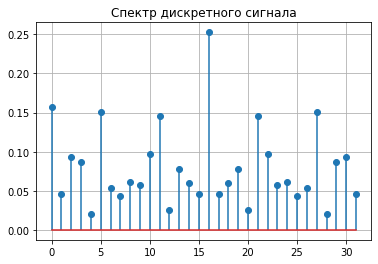

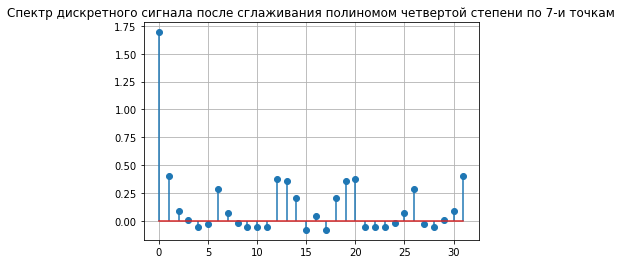

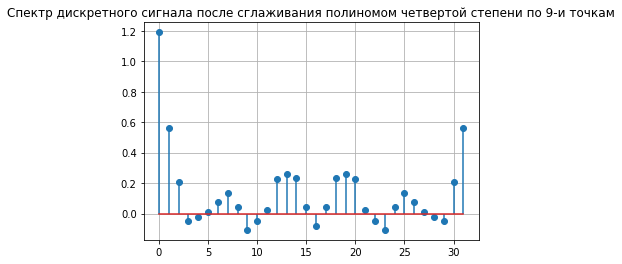

In [71]:
f_7 = fft(y_7)
f_7 = 2 * np.abs(f_7) / len(f_7)
f_11 = fft(y_11)
f_11 = 2 * np.abs(f_11) / len(f_11)

plt.stem(2*np.abs(fft(s_discrete()))/32)
plt.title('Cпектр дискретного сигнала')
plt.grid(True)
plt.show()

plt.stem(fft(f_7))
plt.title('Спектр дискретного сигнала после сглаживания полиномом четвертой степени по 7-и точкам')
plt.grid(True)
plt.show()

plt.stem(fft(f_11))
plt.title('Спектр дискретного сигнала после сглаживания полиномом четвертой степени по 9-и точкам')
plt.grid(True)
plt.show()

Анализ результатов:
1. Вид графиков спектра дискретного сигнала при сглаживании полиномом четвёртой степени по 7-ти и 11-ти точкам повторяет контур $H(ω)$ при сглаживании по соответствующему числу точек.
2. При сглаживании по 11-ти точкам полоса пропускания становится уже, что видно на спектре: большее число дискретных отсчетов ослабляется.

## Выводы

В ходе выполнения данной лабораторной работы был сгенерирован дискретный сигнал. Для него были проведены различные операции сглаживания: линейного сглаживания, сглаживания полиномом 2-й и 4-й степени. Было выяснено, что спектр дискретного сигнала симметричен относительно 0, в спектре (представление в виде дискретных отсчетов) представлено множество частот. Также был построен спектр дискретного сигнала как для оригинала, так и для операций сглаживания.

Для каждого этапа работы были построены соответствующие графики, все этапы сглаживания после построения и интерпретации были сравнены с оригинальным графиком, на основании этого был проведен анализ для каждого сглаживания и сделаны соответствующие выводы.
